<a href="https://colab.research.google.com/github/asheta66/Data-Science/blob/main/Pycaret_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install full version
!pip install pycaret

In [9]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('diabetes')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**PyCaret's setup function offers a wide range of options and parameters to customize the setup of your machine learning experiments. Here are some of the most commonly used options in setup:**

data: The DataFrame or dataset containing your data.

target: The name of the target variable.

train_size: The proportion of the dataset to use for training (default is 0.7 for 70% training).

test_data: A separate DataFrame for testing, if you want to specify it explicitly.

fold_strategy: The strategy for cross-validation (e.g., 'kfold', 'stratifiedkfold', etc.).

fold: Number of folds for cross-validation.

session_id: A random seed for reproducibility.

normalize: Whether to normalize the data.

transformation: Whether to apply feature transformation (e.g., 'yeo-johnson', 'quantile').

transform_target: Whether to transform the target variable.

numeric_features: List of column names to treat as numeric.

categorical_features: List of column names to treat as categorical.

ignore_features: List of column names to ignore during modeling.

pca: Whether to apply Principal Component Analysis (PCA).

pca_components: Number of principal components to use with PCA.

feature_selection: Whether to perform feature selection.

feature_selection_threshold: Threshold for feature selection.

fix_imbalance: Whether to handle class imbalance.

data_split_shuffle: Whether to shuffle the data during split.

use_gpu: Whether to use GPU for modeling.

log_experiment: Whether to log the experiment in the experiment logging platform (e.g., MLflow).

log_plots: Whether to log various plots for model evaluation.

silent: Whether to suppress information messages.

In [22]:
from pycaret.classification import *

# Adjust the train_size parameter to set your desired training ratio
s = setup(data, target='Outcome', session_id=123, train_size=0.8)  # This sets an 80% training and 20% testing split

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(614, 9)"
6,Transformed test set shape,"(154, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [13]:
# functional API
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.5070
ridge,Ridge Classifier,0.7670,0.0000,0.5497,0.7235,0.6221,0.4581,0.4690,0.0330
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.1250
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.3170
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0400
gbc,Gradient Boosting Classifier,0.7373,0.7917,0.5550,0.6445,0.5931,0.4013,0.4059,0.2510
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1700
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.3760
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0430
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.1690


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [14]:
best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# functional API
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

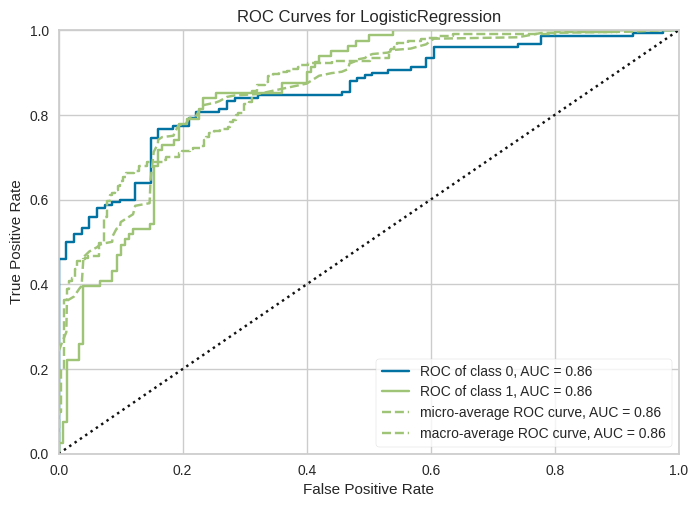

In [16]:
# functional API
plot_model(best, plot = 'auc')

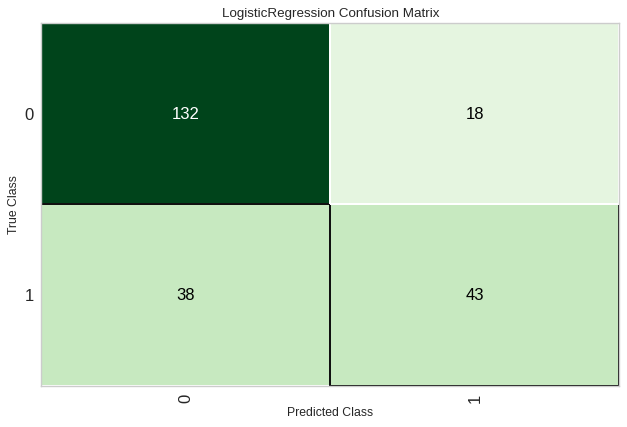

In [17]:
# Generate the confusion matrix plot
plot_model(best, plot='confusion_matrix', scale = 0.8)

In [18]:
# functional API
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.8036
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9648
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9393
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.7998
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.6389
...,...,...,...,...,...,...,...,...,...,...,...
85,2,110,74,29,125,32.400002,0.698,27,0,0,0.8001
7,10,115,0,0,0,35.299999,0.134,29,0,1,0.6228
298,14,100,78,25,184,36.599998,0.412,46,1,0,0.5989
341,1,95,74,21,73,25.900000,0.673,36,0,0,0.9243
